In [28]:
import os

In [29]:
%pwd

'C:\\Users\\RICH-FILES\\Desktop\\ml\\Loan-Amount-Prediction'

In [30]:
os.chdir("../")

In [31]:
%pwd

'C:\\Users\\RICH-FILES\\Desktop\\ml'

In [32]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path
    data_path: Path
    
    

In [33]:
#import from constants and utils
from credit_risk.constants import *
from credit_risk.utils.common import read_yaml, create_directories

In [34]:

#creating a Configuration class
class ConfigurationManager:
    def __init__(
        self,
        config_filepath   = CONFIG_FILE_PATH,
        params_filepath   = PARAMS_FILE_PATH,
        schema_filepath   = SCHEMA_FILE_PATH):
        
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)                       
        self.schema = read_yaml(schema_filepath)  
        
        create_directories([self.config.artifacts_root])
        
    def get_data_transformation_config(self)->DataTransformationConfig:
        config = self.config.data_transformation
        
        create_directories([config.root_dir])
        
        data_transformation_config = DataTransformationConfig(
            root_dir  = config.root_dir,
            data_path = config.data_path,
            
        )
        
        return data_transformation_config
    
       

In [35]:
import os
import pandas as pd 
from sklearn.model_selection import train_test_split
from credit_risk import logger
import matplotlib.pyplot as plt
import seaborn as sns   



In [36]:
project_path = "C:/Users/RICH-FILES/Desktop/ml/Loan-Amount-Prediction"

os.chdir(project_path)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import joblib
import os
import logging

logger = logging.getLogger(__name__)

class DataTransformationConfig:
    def __init__(self, data_path, root_dir):
        self.data_path = data_path
        self.root_dir = root_dir
        

class DataTransformation:
    def __init__(self, config: DataTransformationConfig):
        self.config = config
    
    def data_cleaning(self):
        data = pd.read_csv(self.config.data_path)
        
        # Remove columns which are not necessary for the analysis
        data.drop(columns=["Id", "Status", "Default"], inplace=True)
        
        # Drop null values
        data.dropna(inplace=True)
        
        logger.info("Null values dropped")
        
        # Remove outliers
        data = data[(data['Age'] < 60) & (data['Emp_length'] <= 10) & (data['Income'] < 200000)]
        
        logger.info("Data cleaning complete")
        
        return data
    
    def exploratory_data_analysis(self, data):
        # Check descriptive statistics
        print(data.describe())
        
        # Check non-numeric columns
        print(data.describe(include='object'))
        
        # Check the target variable
        data['Amount'].hist()
        plt.ylabel('Count')
        plt.xlabel('Amount')    
        plt.title('Loan Amount Distribution')
        plt.show()
        
        print("The distribution is right-skewed, meaning most loan amounts fall in the lower range (below 10,000), while fewer loans exist at higher amounts.")
        
        # Check the target variable
        data['Income'].hist()
        plt.ylabel('Count')
        plt.xlabel('Income')    
        plt.title('Income Distribution')
        plt.show()
        
        # Calculate Amount distribution by Age   
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='Age', y='Amount', data=data) 
        plt.xlabel('Age')
        plt.ylabel('Amount')            
        plt.title('Loan Amount by Age')
        plt.show()
        
        # Calculate Amount distribution by Income
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='Income', y='Amount', data=data)    
        plt.xlabel('Income')
        plt.ylabel('Amount')
        plt.title('Loan Amount by Income')
        plt.show()
        
        # Loan purpose count
        plt.figure(figsize=(12, 6))
        data["Intent"].value_counts().plot(kind='bar')
        plt.ylabel('Count')
        plt.xlabel('Intent')
        plt.title('Loan Intent Distribution')
        plt.show()
        
        # Check multicollinearity and correlation
        plt.figure(figsize=(12, 6))  
        corr = data.select_dtypes(include=['int64', 'float64']).drop('Amount', axis=1).corr()    
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()
        
        #drop 'Age'
        data.drop('Age', axis=1, inplace=True)
        
        # dropping columns after feature selection, #columns to be dropped: Home, Rate, Percent_income, Cred_length
        #data.drop(['Home', 'Rate', 'Percent_income', 'Cred_length'], axis=1, inplace=True)
        
        
        return data
    
    def train_test_splitting(self, data):
        
        
        # Split the data into train and test
        train, test = train_test_split(data, test_size=0.2, random_state=42)  
        
        train.to_csv(os.path.join(self.config.root_dir, 'train.csv'), index=False)
        test.to_csv(os.path.join(self.config.root_dir, 'test.csv'), index=False) 
        
        # Save the train and test data to the root directory
        logger.info("Data split into train and test data")  
        logger.info(f"Train data shape: {train.shape}")         
        logger.info(f"Test data shape: {test.shape}")  
        
        print(train.shape)
        print(test.shape)
        
        
        return train, test

    


[2025-03-23 17:01:31,201: INFO: common: yaml file: config\config.yaml loaded successfully]
[2025-03-23 17:01:31,203: INFO: common: yaml file: params.yaml loaded successfully]
[2025-03-23 17:01:31,209: INFO: common: yaml file: schema.yaml loaded successfully]
[2025-03-23 17:01:31,211: INFO: common: created directory at: artifacts]
[2025-03-23 17:01:31,212: INFO: common: created directory at: artifacts/data_transformation]
[2025-03-23 17:01:31,310: INFO: 220492236: Null values dropped]
[2025-03-23 17:01:31,315: INFO: 220492236: Data cleaning complete]
                Age         Income    Emp_length        Amount          Rate  \
count  24961.000000   24961.000000  24961.000000  24961.000000  24961.000000   
mean      27.080445   60543.385001      3.718040   9386.651176     11.068881   
std        5.726081   31425.145297      2.688007   6116.013615      3.205523   
min       20.000000    4000.000000      0.000000    500.000000      5.420000   
25%       23.000000   38000.000000      1.00

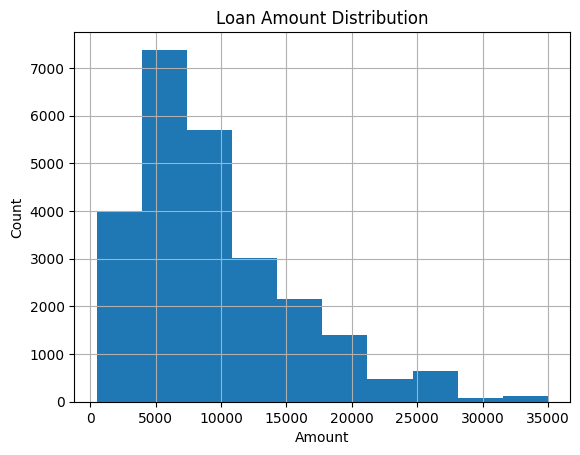

The distribution is right-skewed, meaning most loan amounts fall in the lower range (below 10,000), while fewer loans exist at higher amounts.


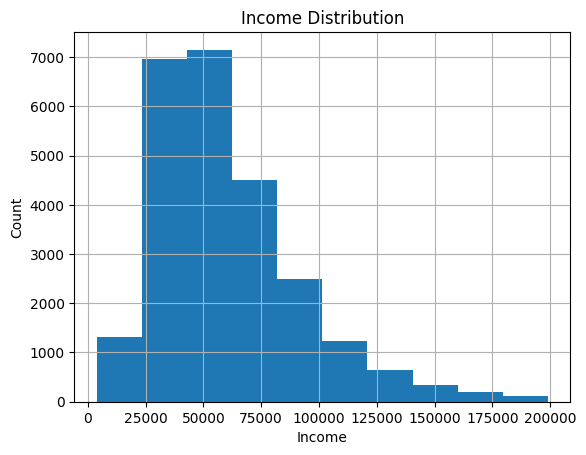

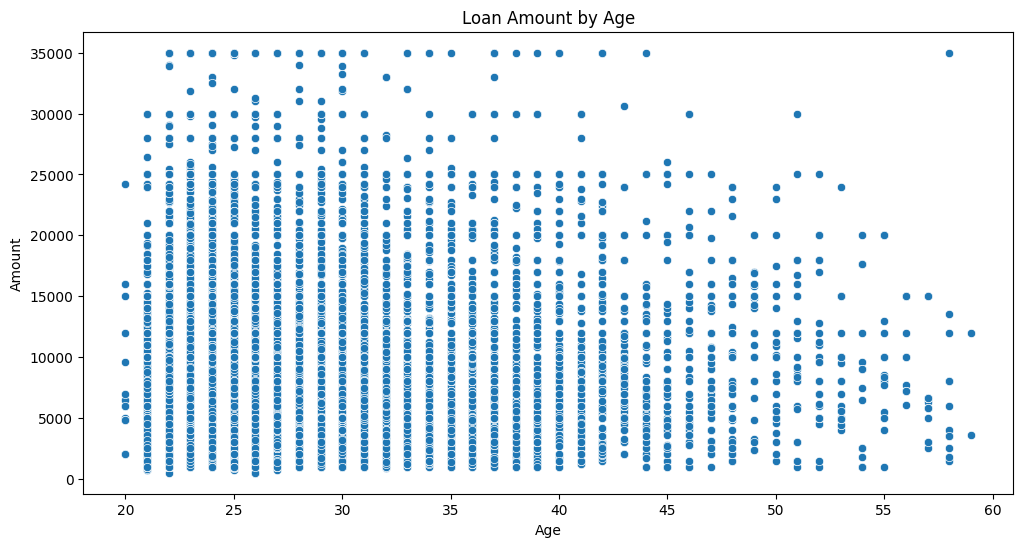

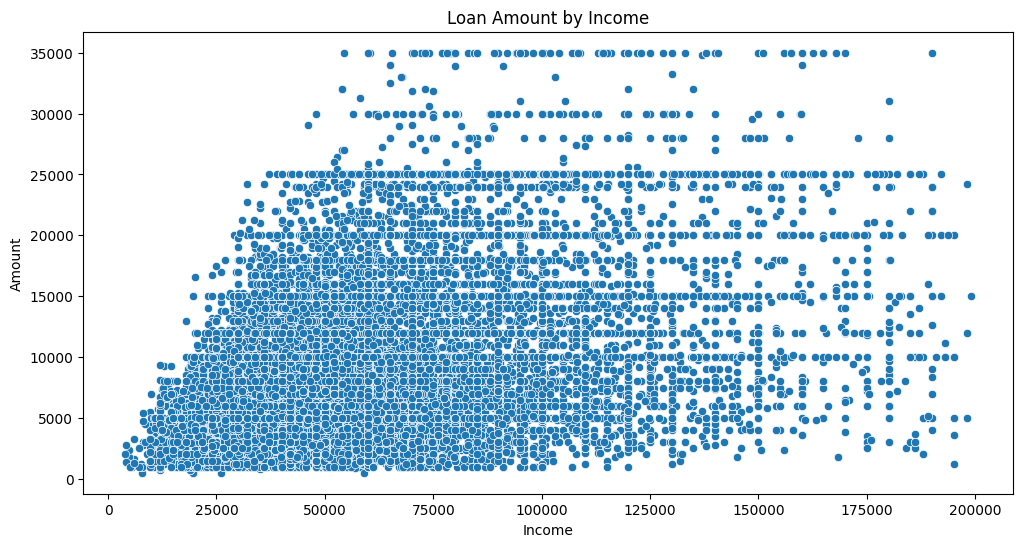

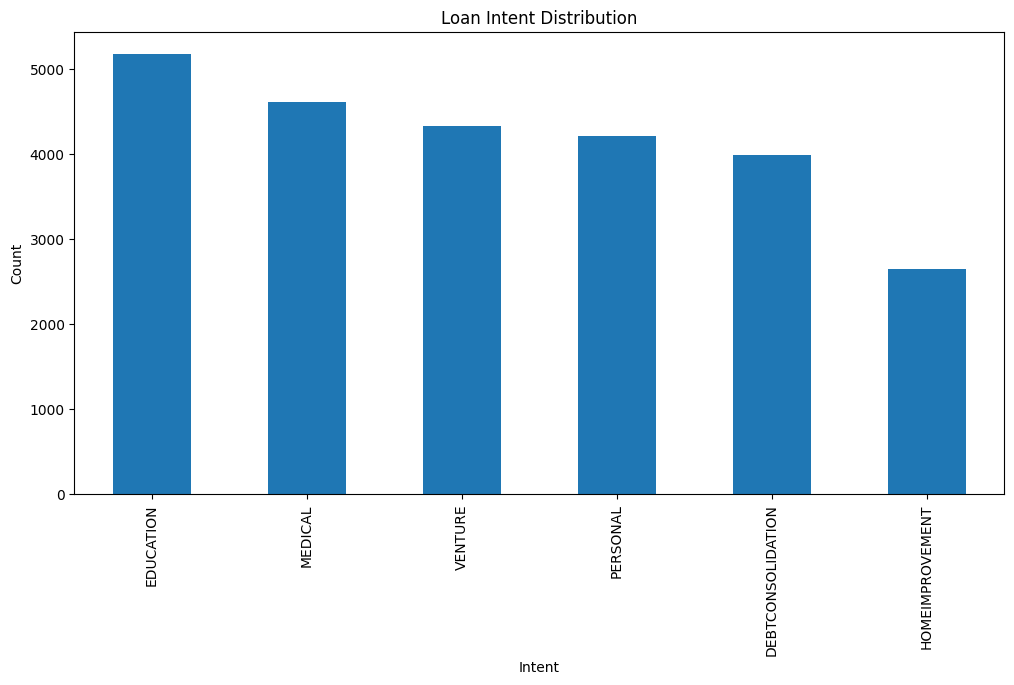

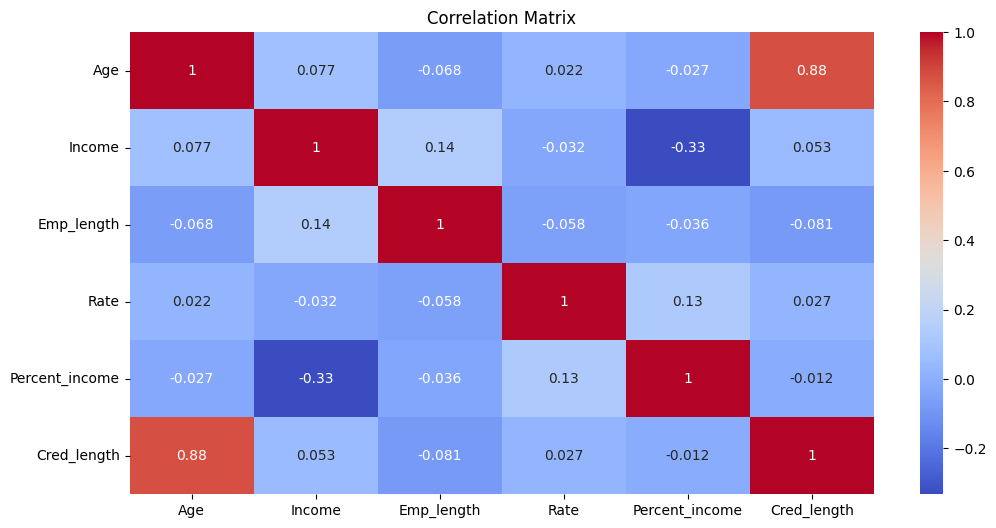

[2025-03-23 17:01:32,631: INFO: 220492236: Data split into train and test data]
[2025-03-23 17:01:32,631: INFO: 220492236: Train data shape: (19968, 8)]
[2025-03-23 17:01:32,631: INFO: 220492236: Test data shape: (4993, 8)]
(19968, 8)
(4993, 8)


In [ ]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config() 
    data_transformation = DataTransformation(config = data_transformation_config)
    # Perform data transformation steps
    cleaned_data = data_transformation.data_cleaning()
    analyzed_data = data_transformation.exploratory_data_analysis(cleaned_data)
    train_data, test_data = data_transformation.train_test_splitting(analyzed_data)
except Exception as e:
    raise e
